In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
data_desc = open('data_description.txt', 'r')

# Data Description

In [5]:
print(data_desc.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [6]:
#Since there are 81 features I'll be taking only the most important ones under consideration

In [7]:
corr_price = data.corrwith(data.SalePrice)

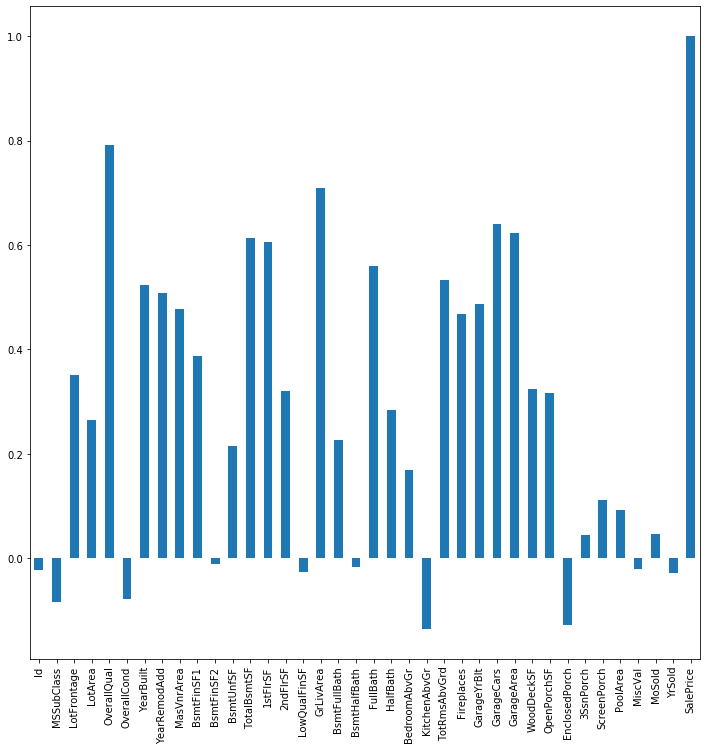

In [8]:

corr_price.plot.bar(figsize=(12,12))

-Okay so price depends upon the overall quality of the house .... tbh the overall quality itself depends upon other variables (no surprise here). But surprisingly the price has a negative relation with overall condition which is weird.

-Cars in garage is also plays a unexpectedly high role in deciding the price of the house(maybe because more cars bigger the garage area and bigger the house).

-Living area is ofcourse one of the main factors that decide the price.

-The newer the house the costlier it will be. The YearBuilt vairable proves that to be true.

In [9]:
#First lets analyse the Dependent variable 

In [10]:
Sale_price = data.SalePrice

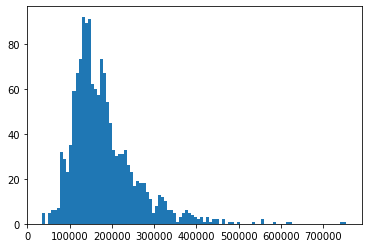

In [11]:
plt.hist(Sale_price, bins=100)
plt.show()

In [12]:
#There are outliers

In [13]:
Sale_price.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [14]:
# Interestingly much of the houses are priced at 200k or below and only 25% of theh houses are above 

In [15]:
expensive_houses = data[data.SalePrice>200000]

In [16]:
not_that_expensive_houses = data[data.SalePrice<200000]

In [17]:
expensive_houses.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,427.000000,427.000000,351.000000,427.000000,427.000000,427.000000,427.000000,427.000000,422.000000,427.000000,...,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000
mean,698.393443,50.175644,81.264957,13988.313817,7.519906,5.386417,1992.140515,1999.145199,198.947867,634.751756,...,142.709602,77.128806,12.622951,5.175644,21.007026,5.442623,21.662763,6.543326,2007.786885,276248.355972
std,423.206666,30.612366,26.016059,16471.082744,1.012343,0.918308,23.046471,11.565794,240.808510,541.821527,...,136.837229,71.285281,55.911699,33.025379,69.952952,56.741017,195.441714,2.847430,1.344094,77978.862864
min,1.000000,20.000000,30.000000,3013.000000,4.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,200100.000000
25%,322.500000,20.000000,68.000000,9489.000000,7.000000,5.000000,1991.500000,1996.500000,0.000000,0.000000,...,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,224900.000000
50%,666.000000,60.000000,80.000000,11287.000000,7.000000,5.000000,2002.000000,2003.000000,145.000000,655.000000,...,144.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,252678.000000
75%,1056.500000,60.000000,91.000000,13848.500000,8.000000,5.000000,2006.000000,2006.000000,300.000000,1107.000000,...,208.000000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,306500.000000
max,1458.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2188.000000,...,857.000000,547.000000,552.000000,304.000000,480.000000,738.000000,2500.000000,12.000000,2010.000000,755000.000000


In [18]:
not_that_expensive_houses.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1025.000000,1025.000000,844.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1022.000000,1025.000000,...,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,743.967805,59.565854,65.341232,9067.083902,5.506341,5.655610,1962.481951,1978.853659,64.449119,364.446829,...,73.447805,33.525854,25.609756,2.700488,12.701463,1.662439,52.189268,6.224390,2007.828293,141060.388293
std,419.662916,45.976618,21.963350,4683.054659,1.049651,1.178183,28.498422,20.702649,131.339415,389.990469,...,114.040758,59.228516,62.465881,27.730762,48.700462,30.924038,578.192482,2.634727,1.322794,32860.835604
min,2.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,387.000000,20.000000,55.000000,7032.000000,5.000000,5.000000,1946.000000,1959.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,119500.000000
50%,759.000000,50.000000,64.000000,8777.000000,5.000000,5.000000,1964.000000,1977.000000,0.000000,328.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,141000.000000
75%,1101.000000,80.000000,75.000000,10500.000000,6.000000,6.000000,1980.000000,2000.000000,84.000000,619.000000,...,140.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,167900.000000
max,1460.000000,190.000000,313.000000,63887.000000,10.000000,9.000000,2009.000000,2010.000000,1129.000000,5644.000000,...,736.000000,523.000000,330.000000,508.000000,385.000000,648.000000,15500.000000,12.000000,2010.000000,199900.000000


In [19]:
def ploting_variables(variable):
    vals = np.size(data[variable].unique())
    if vals>100:
        vals=100
    
    fig = plt.figure(figsize=(15,15))
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.suptitle(variable)
    ax1.hist(expensive_houses[variable], bins = vals)
    ax1.set_title('Expensive')
    
    ax2.hist(not_that_expensive_houses[variable], bins=vals)
    ax2.set_title('Not that Expensive')
    
    plt.tight_layout(rect=(0,0.03,1,0.98))

In [20]:
numeric_data = data.select_dtypes(exclude='object')

In [21]:
obj_data = data.select_dtypes(include='object')

C:\Users\samit\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\samit\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\samit\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\samit\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  

<Figure size 1080x1080 with 0 Axes>

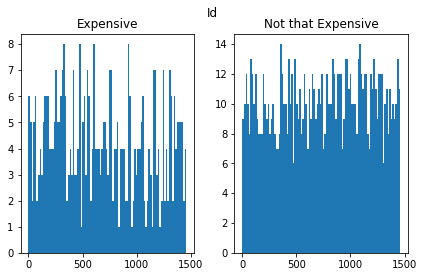

<Figure size 1080x1080 with 0 Axes>

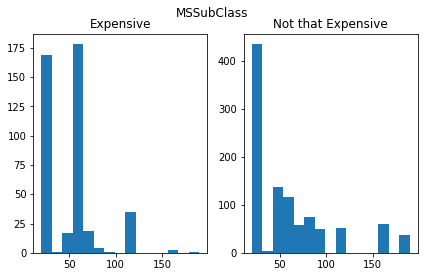

<Figure size 1080x1080 with 0 Axes>

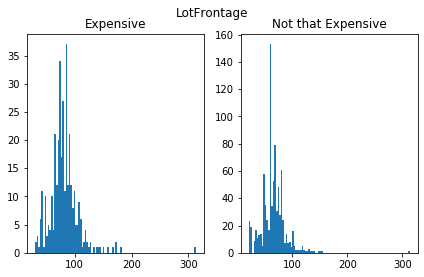

<Figure size 1080x1080 with 0 Axes>

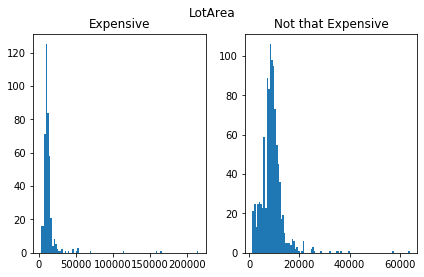

<Figure size 1080x1080 with 0 Axes>

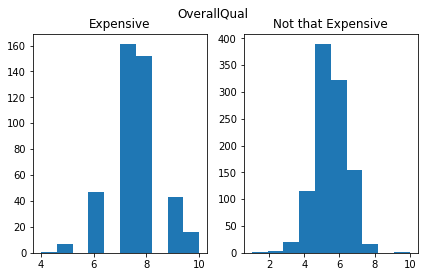

<Figure size 1080x1080 with 0 Axes>

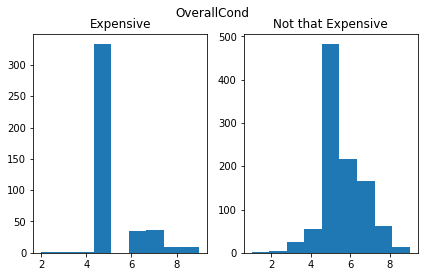

<Figure size 1080x1080 with 0 Axes>

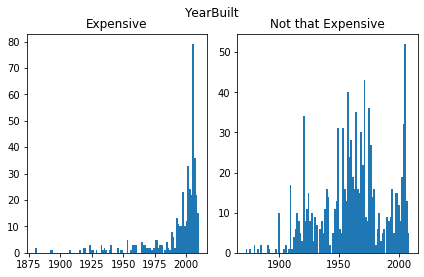

<Figure size 1080x1080 with 0 Axes>

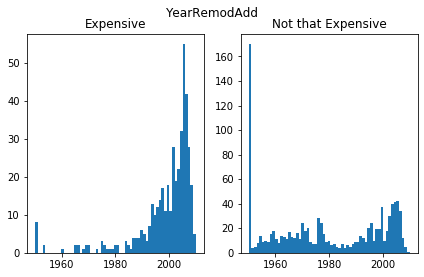

<Figure size 1080x1080 with 0 Axes>

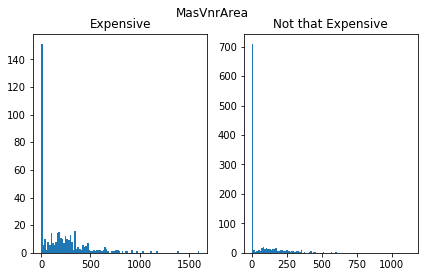

<Figure size 1080x1080 with 0 Axes>

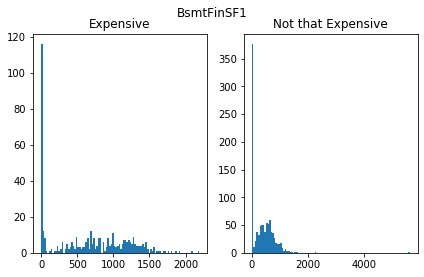

<Figure size 1080x1080 with 0 Axes>

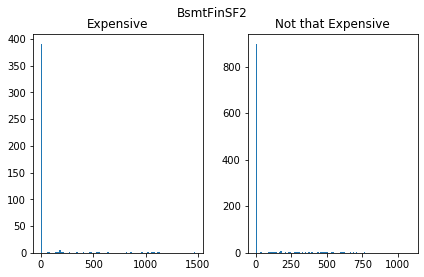

<Figure size 1080x1080 with 0 Axes>

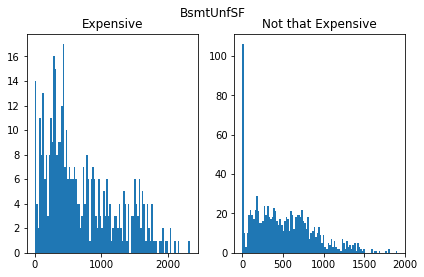

<Figure size 1080x1080 with 0 Axes>

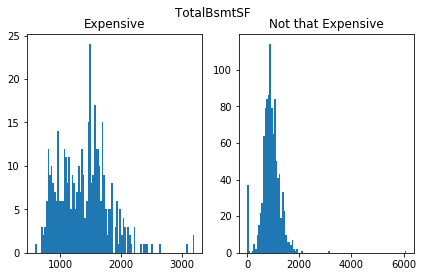

<Figure size 1080x1080 with 0 Axes>

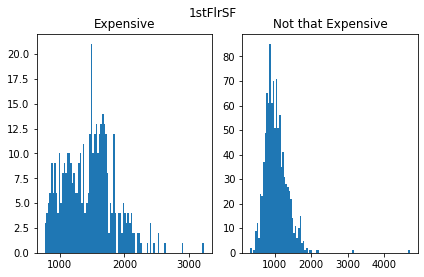

<Figure size 1080x1080 with 0 Axes>

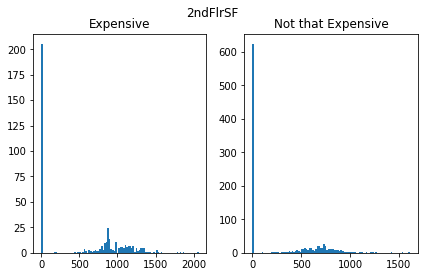

<Figure size 1080x1080 with 0 Axes>

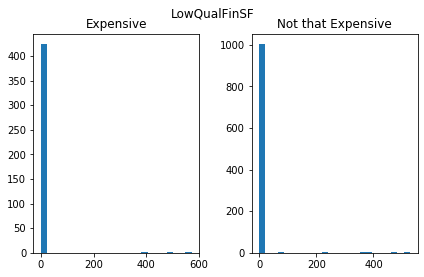

<Figure size 1080x1080 with 0 Axes>

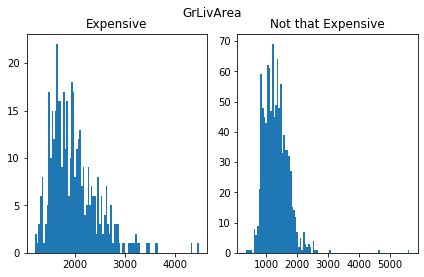

<Figure size 1080x1080 with 0 Axes>

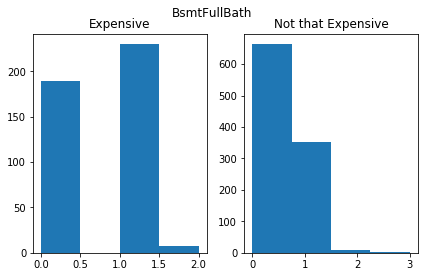

<Figure size 1080x1080 with 0 Axes>

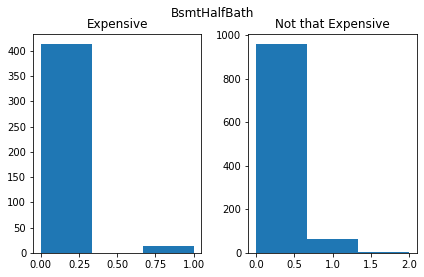

<Figure size 1080x1080 with 0 Axes>

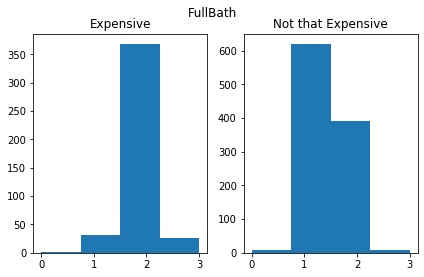

<Figure size 1080x1080 with 0 Axes>

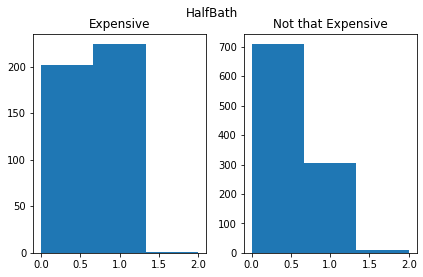

<Figure size 1080x1080 with 0 Axes>

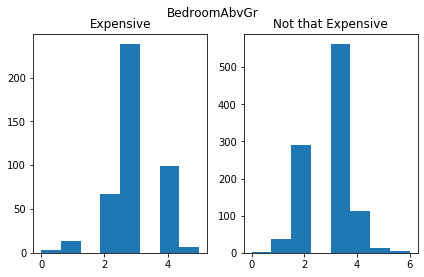

<Figure size 1080x1080 with 0 Axes>

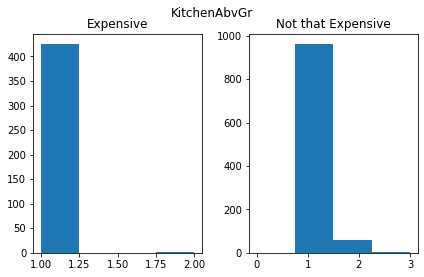

<Figure size 1080x1080 with 0 Axes>

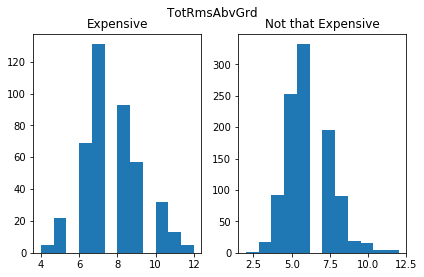

<Figure size 1080x1080 with 0 Axes>

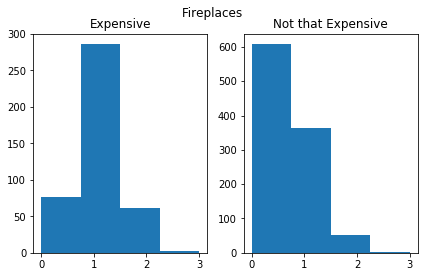

<Figure size 1080x1080 with 0 Axes>

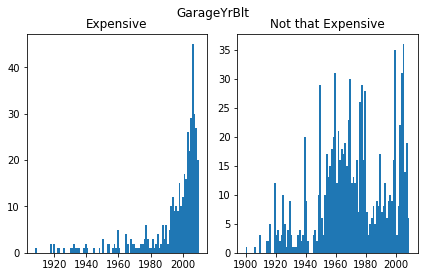

<Figure size 1080x1080 with 0 Axes>

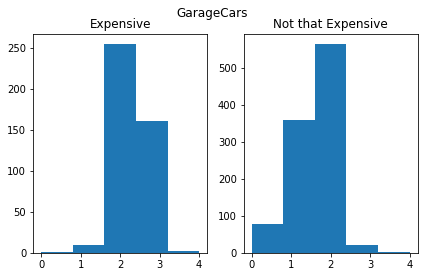

<Figure size 1080x1080 with 0 Axes>

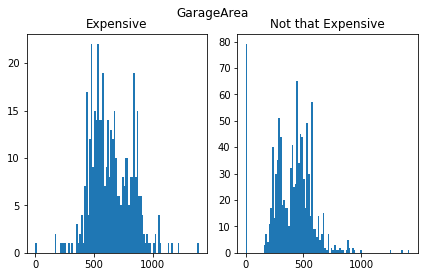

<Figure size 1080x1080 with 0 Axes>

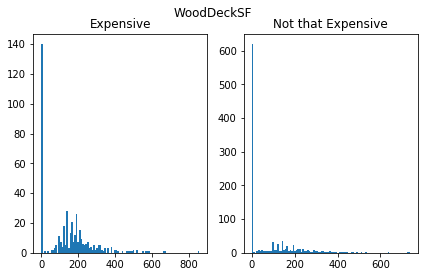

<Figure size 1080x1080 with 0 Axes>

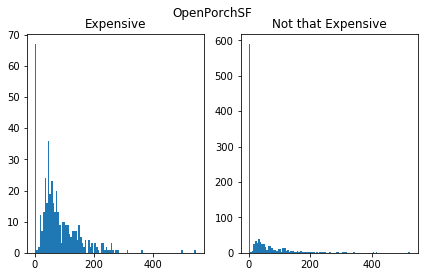

<Figure size 1080x1080 with 0 Axes>

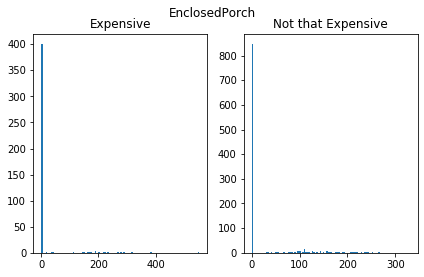

<Figure size 1080x1080 with 0 Axes>

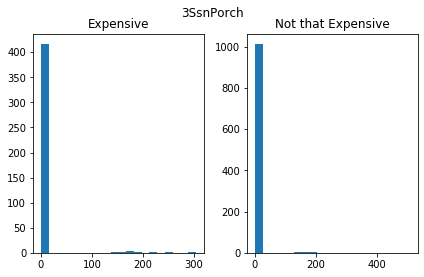

<Figure size 1080x1080 with 0 Axes>

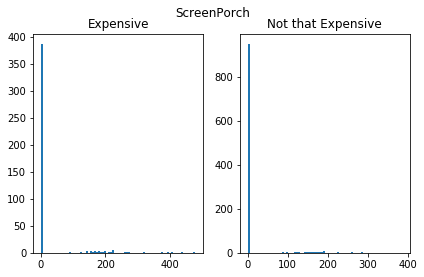

<Figure size 1080x1080 with 0 Axes>

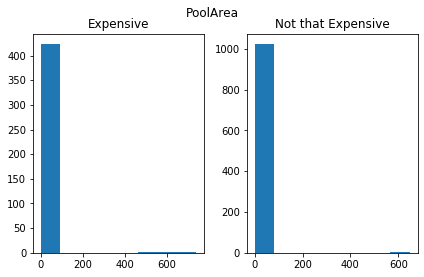

<Figure size 1080x1080 with 0 Axes>

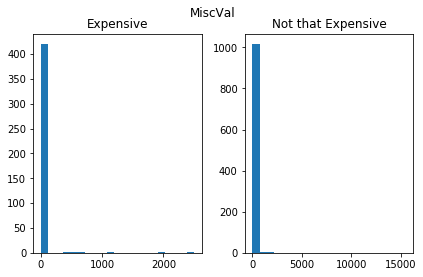

<Figure size 1080x1080 with 0 Axes>

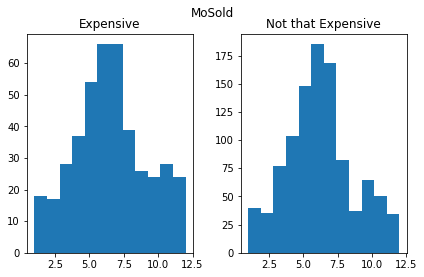

<Figure size 1080x1080 with 0 Axes>

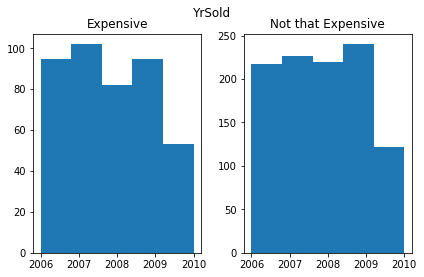

<Figure size 1080x1080 with 0 Axes>

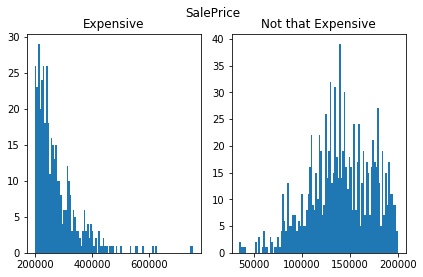

In [22]:
for i in numeric_data.columns.values:
    ploting_variables(i)

In [23]:
def ploting_variables_obj(variable):
    
    order = data[variable].unique()
    fig = plt.figure(figsize=(15,15))
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.suptitle(variable)
    
    plot1 = sns.countplot(expensive_houses[variable],order=order,ax=ax1)
    ax1.set_title('Expensive')
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
    
    
    sns.countplot(not_that_expensive_houses[variable],order=order,ax=ax2)
    ax2.set_title('Not that Expensive')
    ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)
    
    plt.tight_layout(rect=(0,0.03,1,0.98))

C:\Users\samit\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
C:\Users\samit\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


<Figure size 1080x1080 with 0 Axes>

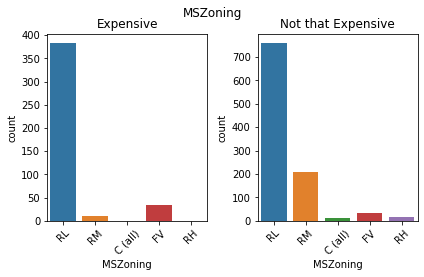

<Figure size 1080x1080 with 0 Axes>

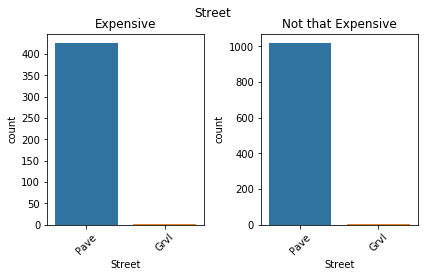

<Figure size 1080x1080 with 0 Axes>

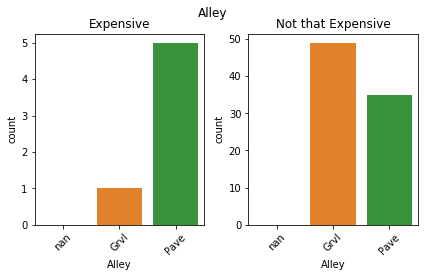

<Figure size 1080x1080 with 0 Axes>

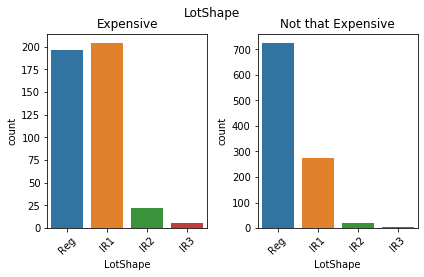

<Figure size 1080x1080 with 0 Axes>

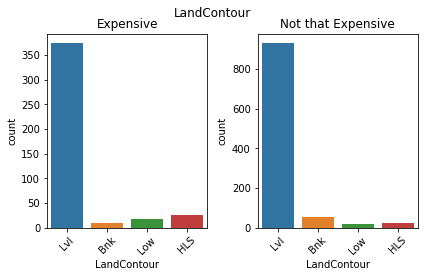

<Figure size 1080x1080 with 0 Axes>

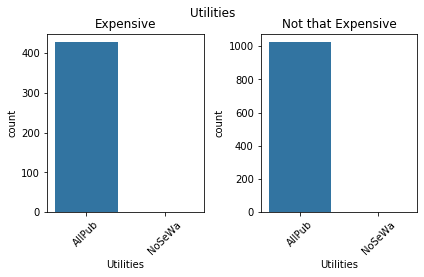

<Figure size 1080x1080 with 0 Axes>

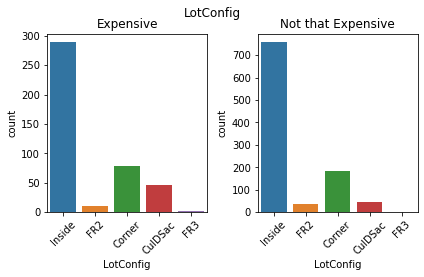

<Figure size 1080x1080 with 0 Axes>

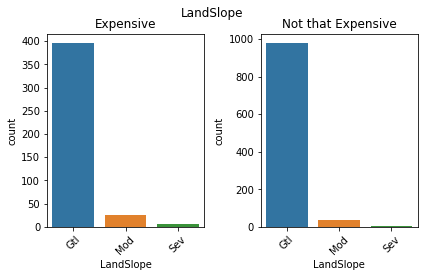

<Figure size 1080x1080 with 0 Axes>

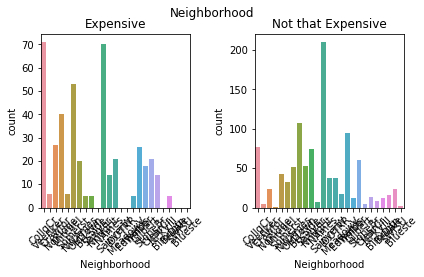

<Figure size 1080x1080 with 0 Axes>

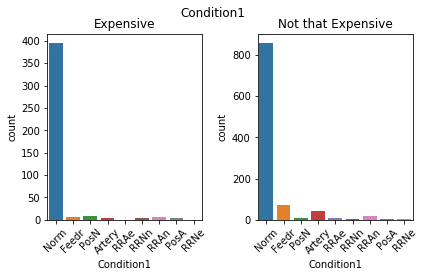

<Figure size 1080x1080 with 0 Axes>

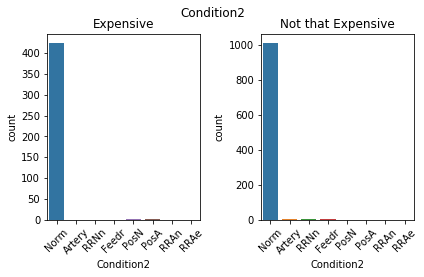

<Figure size 1080x1080 with 0 Axes>

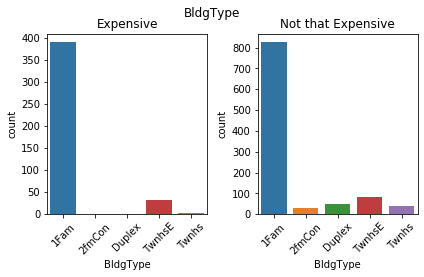

<Figure size 1080x1080 with 0 Axes>

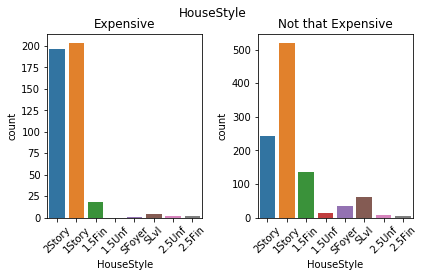

<Figure size 1080x1080 with 0 Axes>

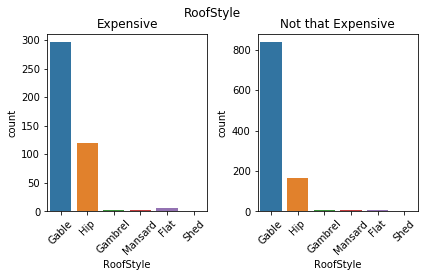

<Figure size 1080x1080 with 0 Axes>

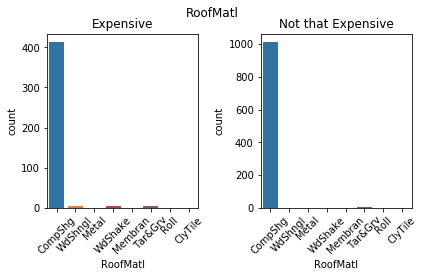

<Figure size 1080x1080 with 0 Axes>

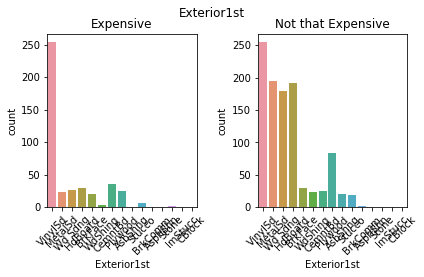

<Figure size 1080x1080 with 0 Axes>

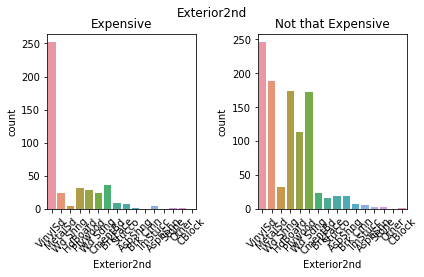

<Figure size 1080x1080 with 0 Axes>

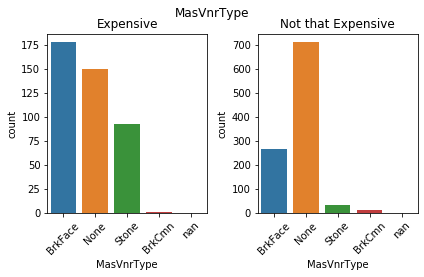

<Figure size 1080x1080 with 0 Axes>

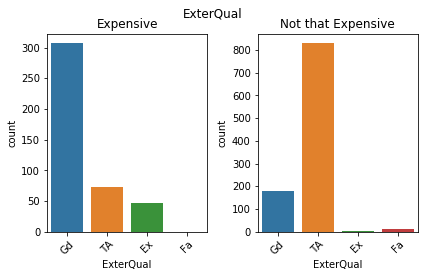

<Figure size 1080x1080 with 0 Axes>

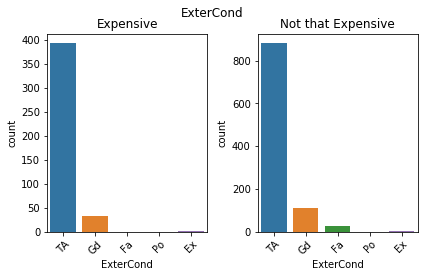

<Figure size 1080x1080 with 0 Axes>

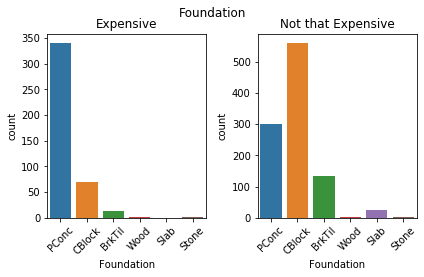

<Figure size 1080x1080 with 0 Axes>

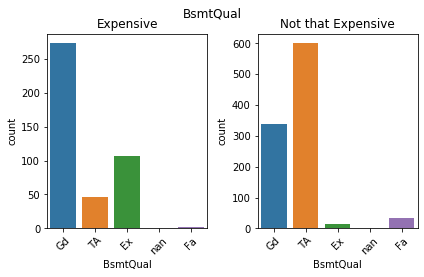

<Figure size 1080x1080 with 0 Axes>

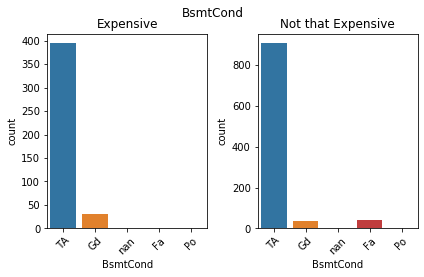

<Figure size 1080x1080 with 0 Axes>

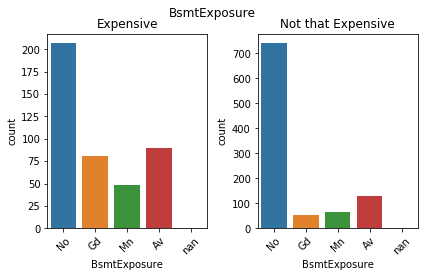

<Figure size 1080x1080 with 0 Axes>

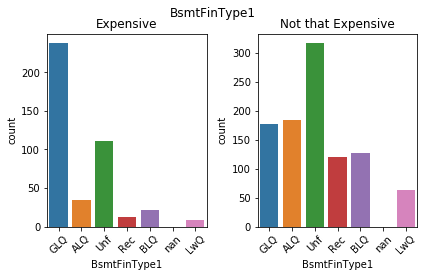

<Figure size 1080x1080 with 0 Axes>

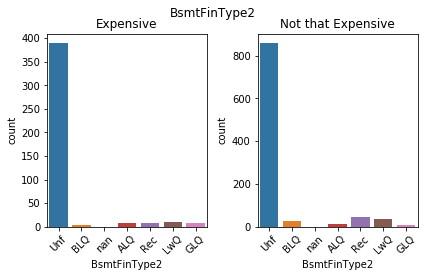

<Figure size 1080x1080 with 0 Axes>

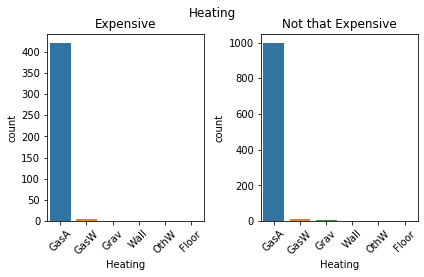

<Figure size 1080x1080 with 0 Axes>

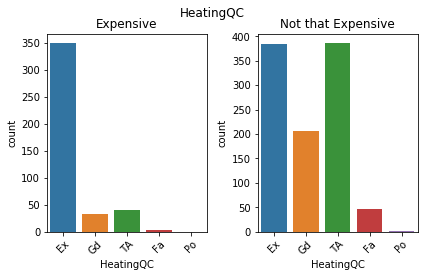

<Figure size 1080x1080 with 0 Axes>

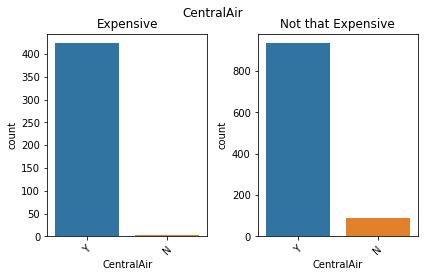

<Figure size 1080x1080 with 0 Axes>

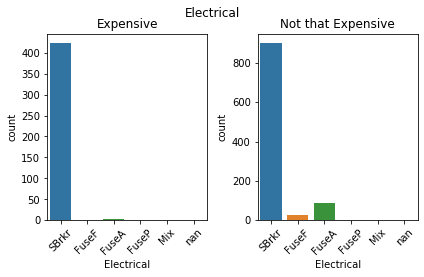

<Figure size 1080x1080 with 0 Axes>

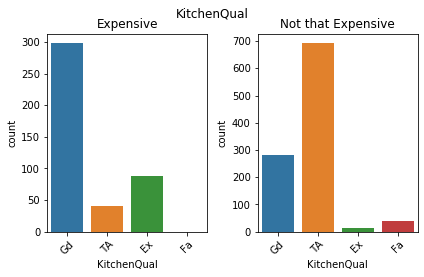

<Figure size 1080x1080 with 0 Axes>

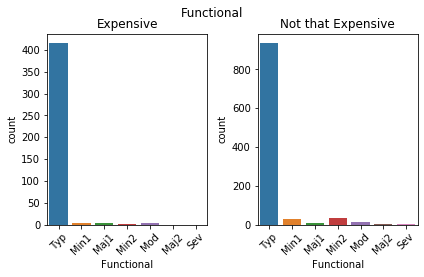

<Figure size 1080x1080 with 0 Axes>

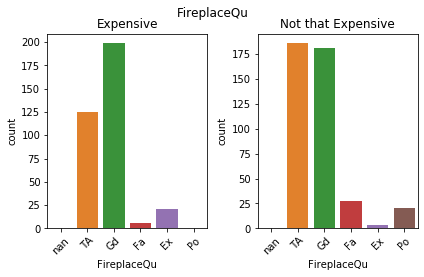

<Figure size 1080x1080 with 0 Axes>

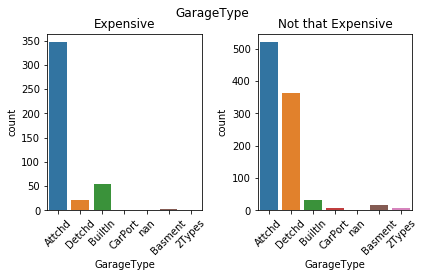

<Figure size 1080x1080 with 0 Axes>

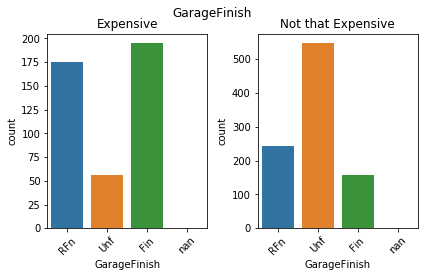

<Figure size 1080x1080 with 0 Axes>

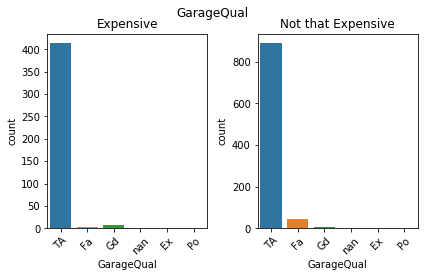

<Figure size 1080x1080 with 0 Axes>

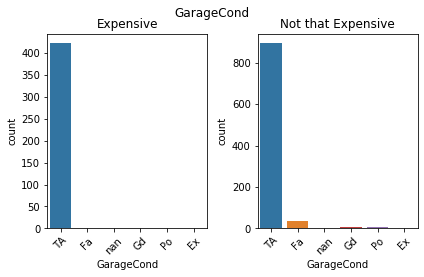

<Figure size 1080x1080 with 0 Axes>

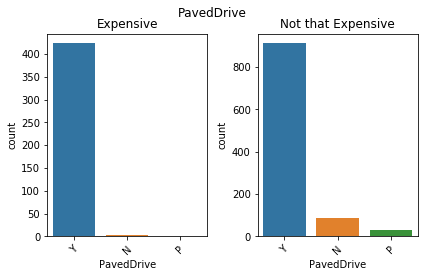

<Figure size 1080x1080 with 0 Axes>

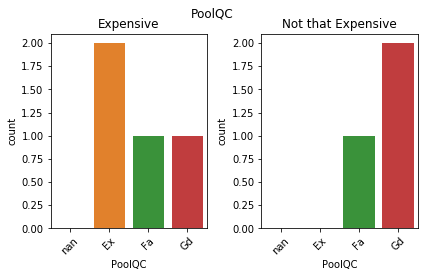

<Figure size 1080x1080 with 0 Axes>

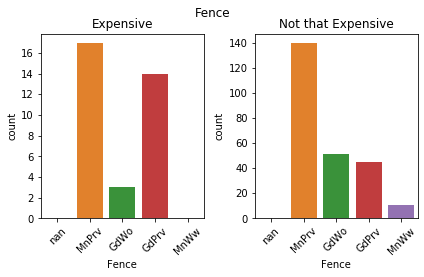

<Figure size 1080x1080 with 0 Axes>

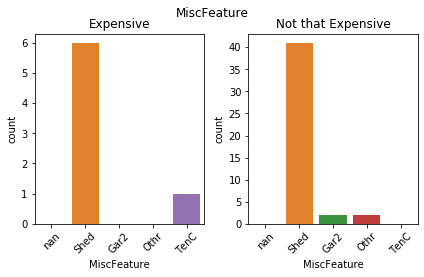

<Figure size 1080x1080 with 0 Axes>

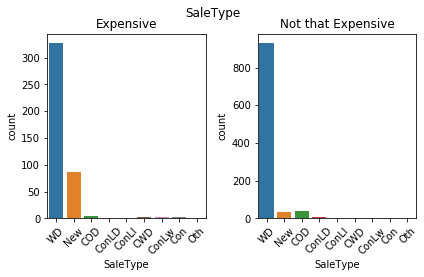

<Figure size 1080x1080 with 0 Axes>

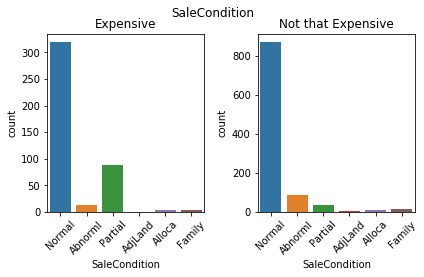

In [24]:
for i in obj_data.columns.values:
    ploting_variables_obj(i)

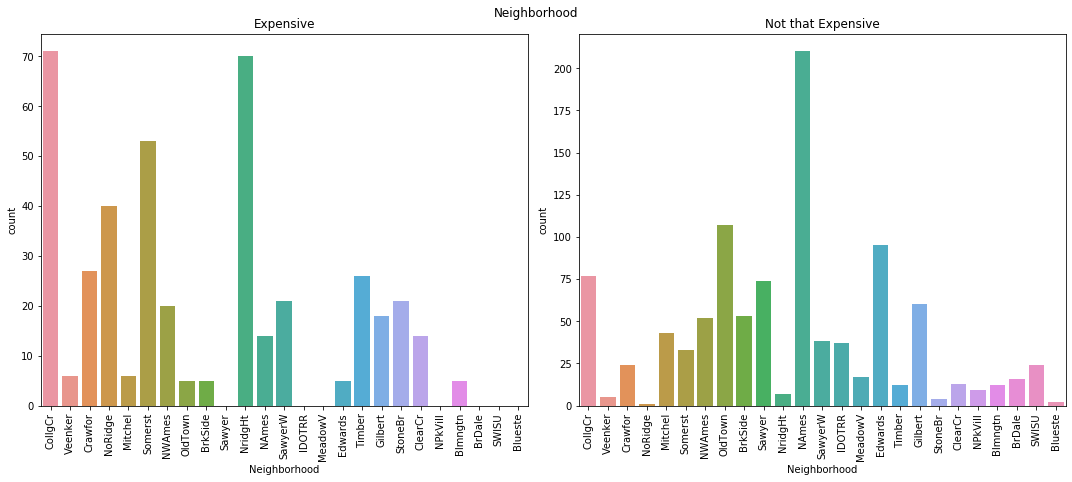

In [25]:
    order = data['Neighborhood'].unique()
    
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.suptitle('Neighborhood')
    
    plot1 = sns.countplot(expensive_houses['Neighborhood'],order=order,ax=ax1)
    ax1.set_title('Expensive')
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
    fig.set_figheight(7)
    fig.set_figwidth(15)
    
    
    sns.countplot(not_that_expensive_houses['Neighborhood'],order=order,ax=ax2)
    ax2.set_title('Not that Expensive')
    ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
    
    plt.tight_layout(rect=(0,0.03,1,0.98))

# Correlation with each other

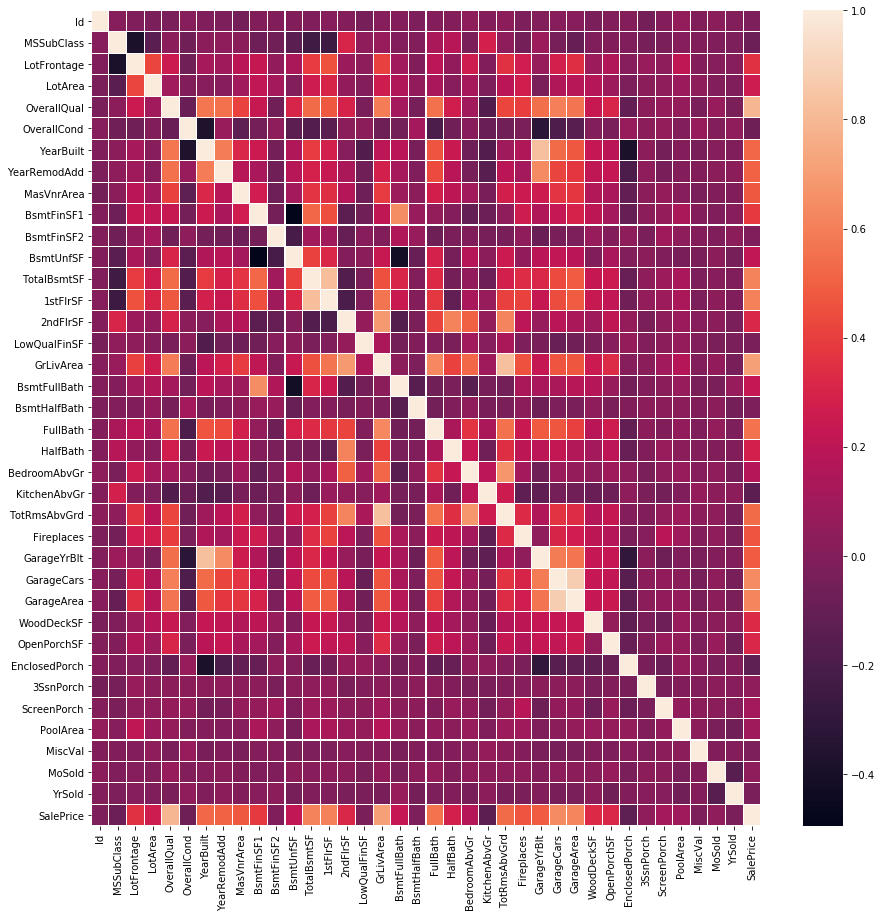

In [26]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),linewidths=0.05)

# Bivariate Analysis

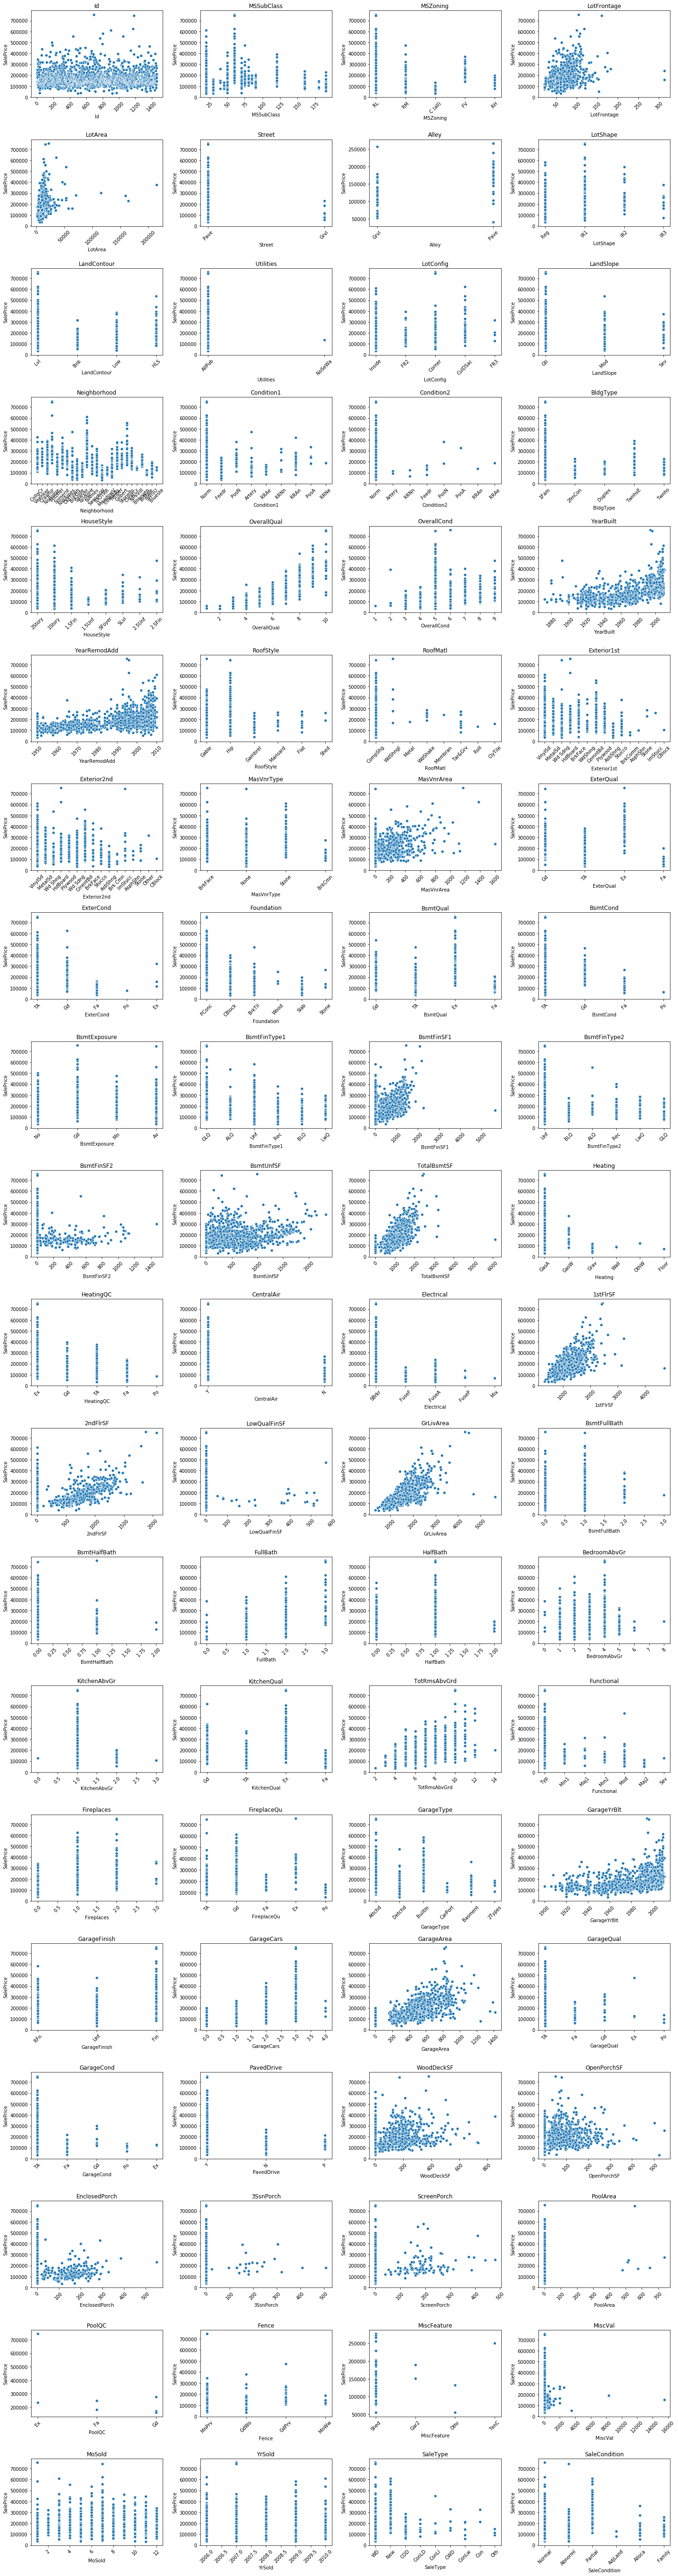

In [27]:
fig=plt.figure(figsize=(20,80))
for i in range(1,data.shape[1]):
    plt.subplot(20,4,i)
    fig = plt.gca()
    fig = sns.scatterplot(x=data.iloc[:,i-1], y=data.SalePrice)
    fig.set_title(data.columns.values[i-1])
    plt.xticks(rotation=45)
plt.tight_layout(rect=(0,0.03,1,0.98))

# Pie charts

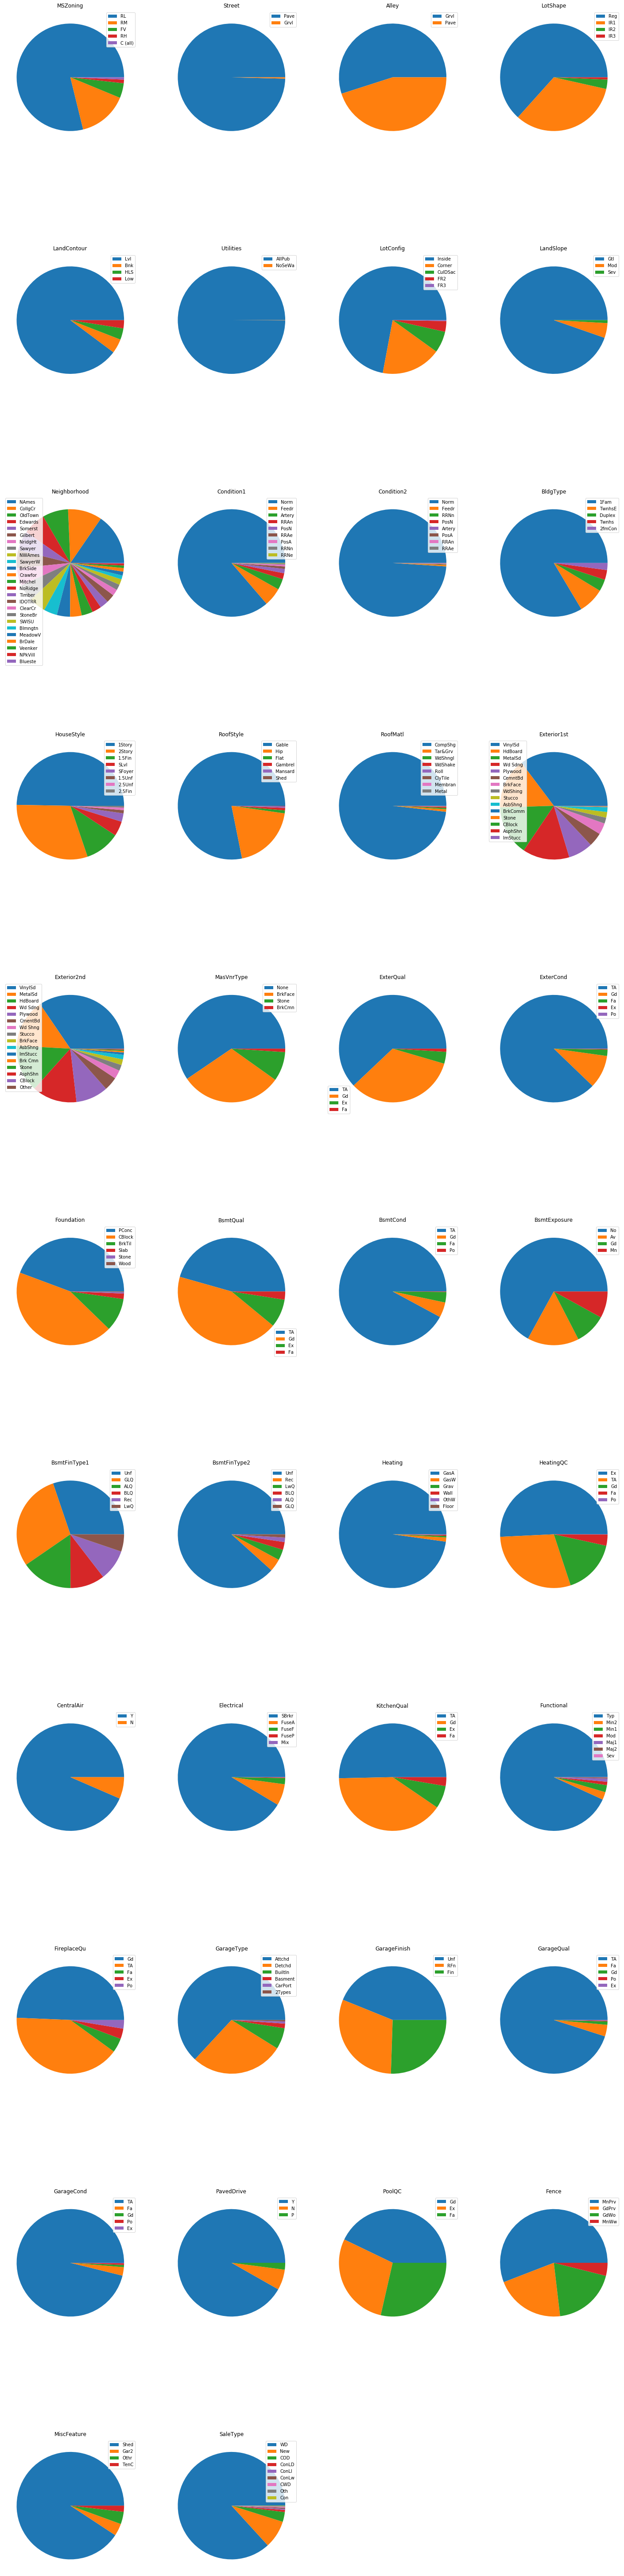

In [35]:
fig=plt.figure(figsize=(25,200))
for i in range(1,obj_data.shape[1]):
    plt.subplot(20,4,i)
    fig = plt.gca()
    values =  obj_data.iloc[:, i-1].value_counts(normalize = True).values
    index =  obj_data.iloc[:, i-1].value_counts(normalize = True).index
    plt.pie(values)
    plt.legend(labels=index)
   
    fig.set_title(obj_data.columns.values[i-1])


Few vairables have only one field dominating the data which makes those variables unfit for the prediction. As the model wont be able to predict the impact of different categories of that variable on price
for eg Street variable has almost all paved streets, the model wont be able to tell the difference in the price of the house having gravel streets and house having paved streets

If we check the bivariate analysis above, it doesnt matter what street does the house is connected to as per the given data. If only we had more houses with gravel streets we could have predicted whether differet=nt streets have an impact on the price

Same goes for Utilities, RoofMatl, Condition2 and Heating. Few variables have some variations in them but still are not quite useful.

# Lets check which variables should we consider before buying a new house next

In [29]:
data.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

- MSSubClass, MSZoning doesn't seem to have huge impact on the prices but housing in Floating Village Residential zoning seem to have a little higher price tag on them.

- Linear feet of street connected to property definitely have a impact on the price with a few exceptions. So this needs to be taken under consideration while buying the house

- If the house has a paved alley access to property then it may cost more than a gravel alley

- Neighborhood definitely is of absolute importance when it comes to determining the price. Selected neighborhoods have very expensive houses compared to others.

- Masonry veneer type is of stone then the house is tend to cost more. Even bigger the area costlier the house.

- Now if you look at the bivariate analysis there is almost no house priced below 200k(approx). So if pool is your priority then your house will most likely be above 200k

In [30]:
data[data.MiscFeature =='TenC']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1386,1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000


- Now if you look at the MiscFeature bivariate analysis, you'll see that having a tenis court increases the price to a great extent. But since there is only one house with tenis court in the data it is difficult to prove that it really is the case.

Same way having extra luxurious features to your house is gonna increase the price of it but since the data is not enough we cant really say how much of a difference thus it make.

# Let's compare the lowest priced house and the highest priced house 

In [31]:
min_price = data.SalePrice.min()

In [32]:
max_price = data.SalePrice.max()

In [33]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data[data.SalePrice == min_price])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,495,Unf,0,225,720,GasA,TA,N,FuseA,720,0,0,720,0,0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,523,115,0,0,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900


In [34]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    
    display(data[data.SalePrice == max_price])



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


As you can see there are a lot reasons why the house is expensive 
for eg: The overall Quality is 10 while it is 4 of the cheaper house
Neighborhood: NoRidge which have very few houses priced below 200k where as IODTRR having zero houses above 200k
Year built: 1994 vs 1920
GrLivArea : The expensive house has upto 6 times larger area than the cheaper house

So yeah we can see why the house is really that expensive compared to the cheaper house